In [44]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt



In [45]:
mat=sio.loadmat('data/ex8data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [46]:
X=mat['X']
Xval,yval=mat['Xval'],mat['yval']
X.shape,Xval.shape,yval.shape

((307, 2), (307, 2), (307, 1))

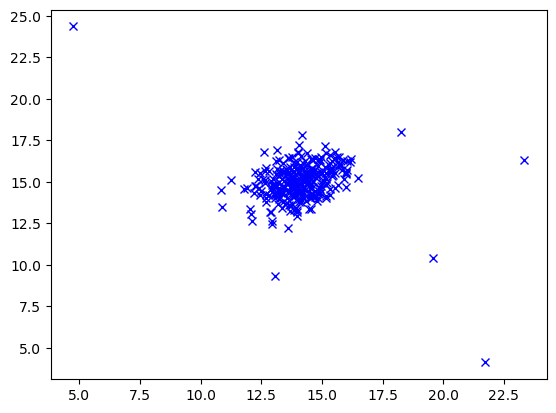

In [47]:
plt.plot(X[:,0],X[:,1],'bx')
plt.show()

# 获取均值方差

In [49]:
def estimateGaussian(X,isConvariance):
    means=np.mean(X,axis=0)
    if isConvariance:
        sigma2=(X-means).T@(X-means)/len(X)
    else:
        sigma2=np.var(X,axis=0)
    return means,sigma2

In [50]:
means,sigma2=estimateGaussian(X,isConvariance=True)
sigma2#对角线那条就是协方差

array([[ 1.83263141, -0.22712233],
       [-0.22712233,  1.70974533]])

In [51]:
means,sigma2=estimateGaussian(X,isConvariance=False)
sigma2

array([1.83263141, 1.70974533])

# 密度函数

In [123]:
def gaussian(X,means,sigma2):
    if np.ndim(sigma2)==1:
        sigma2=np.diag(sigma2)#转换成二维矩阵 把元素变成对角线元素其余为0
    X=X-means
    n=X.shape[1]
    first=np.power(2*np.pi,-n/2)*(np.linalg.det(sigma2)**(-0.5))
    second=np.diag(X@np.linalg.inv(sigma2)@X.T)
    p=first*np.exp(-0.5*second)
    p = p.reshape(-1,1)
    return p

In [125]:
def plotGuassian(X,means,sigma2):
    x=np.arange(0,30,0.5)
    y=np.arange(0,30,0.5)
    xx,yy=np.meshgrid(x,y)
    z=gaussian(np.c_[xx.ravel(),yy.ravel()],means,sigma2)#计算对应的高斯分布函数
    zz=z.reshape(xx.shape)
    plt.plot(X[:,0],X[:,1],'bx')
    contour_levels=[10**h for h in range(-20,0,3)]
    plt.contour(xx,yy,zz,contour_levels)

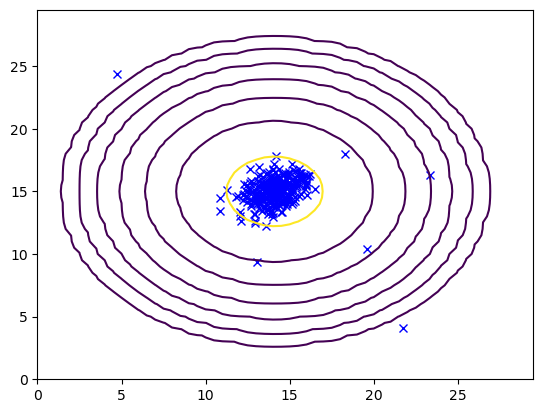

In [127]:
means,sigma2=estimateGaussian(X,isConvariance=False)
plotGuassian(X,means,sigma2)

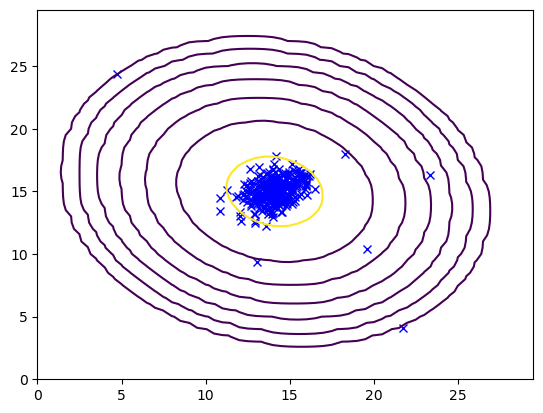

In [129]:
means,sigma2=estimateGaussian(X,isConvariance=True)
plotGuassian(X,means,sigma2)

# 阈值epsilon选取

In [131]:
def selectThreshold(yval,p):
    bestEpsilon=0
    bestF1=0
    epsilons=np.linspace(min(p),max(p),1000)
    for e in epsilons:
        p_=p<e
        tp=np.sum((yval==1)&(p_==1))
        fp=np.sum((yval==0)&(p_==1))
        fn=np.sum((yval==1)&(p_==0))
        prec=tp/(tp+fp)if(tp+fp)else 0
        rec=tp/(tp+fn)if(tp+fn)else 0
        F1_e=2*prec*rec/(prec+rec)if(prec+rec)else 0
        if F1_e>bestF1:
            bestF1=F1_e
            bestEpsilon=e
    return bestEpsilon,bestF1
    

In [133]:
means,sigma2=estimateGaussian(X,isConvariance=False)
pval=gaussian(Xval,means,sigma2)
bestEpsilon,bestF1=selectThreshold(yval,pval)

In [135]:
bestEpsilon,bestF1

(array([8.99985263e-05]), 0.8750000000000001)

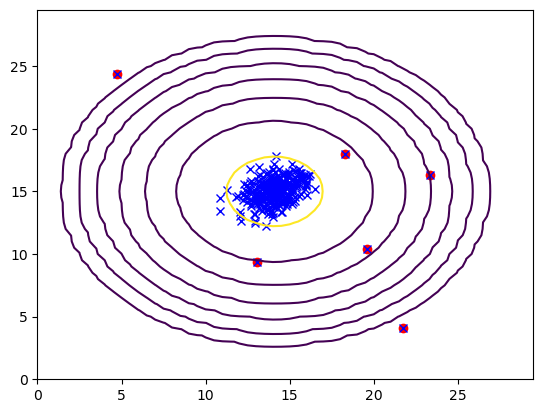

In [154]:
p=gaussian(X,means,sigma2)
anoms=np.array([X[i] for i in range(X.shape[0])if p[i]<bestEpsilon])
plotGuassian(X,means,sigma2)
plt.scatter(anoms[:,0],anoms[:,1],c='r',marker='o')

# 高维数据

In [146]:
mat = sio.loadmat( 'data/ex8data2.mat' )
X2 = mat['X']
Xval2, yval2 = mat['Xval'], mat['yval']
X2.shape 

(1000, 11)

In [156]:
means,sigma2=estimateGaussian(X2,isConvariance=False)
pval=gaussian(Xval2,means,sigma2)
bestEpsilon,bestF1=selectThreshold(yval2,pval)
p=gaussian(X2,means,sigma2)
anoms=np.array([X2[i] for i in range(X2.shape[0])if p[i]<bestEpsilon])